# **Deep Learning**

## **Classifying handwritten digits**

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


mnist has 70,000 images (28x28) of handwritten number.  
Train 60,000  
Testing 10,000  


In [4]:
# image of 28x28 => array of 784 values 

# train_images => each row will have one image, such 60,000 rows to be created
# test_images => each row will have one image, such 10,000 rows to be created

In [5]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)

In [6]:
# convert interger values to float 32 values
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [7]:
# normalise each value to 0 to 1 scale
train_images /= 255
test_images /= 255

In [8]:
# Converting labels to one hot encoded format
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [9]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [10]:
test_labels[0].argmax()

7

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


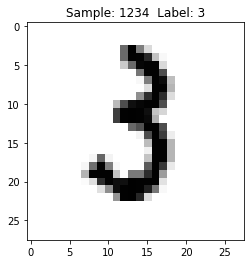

In [11]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [12]:
# Model Build based on Tensorflow Keras
model = Sequential() 
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax')) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [15]:
# Training of model
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))


Epoch 1/10
600/600 - 8s - loss: 0.2410 - accuracy: 0.9304 - val_loss: 0.1205 - val_accuracy: 0.9627
Epoch 2/10
600/600 - 8s - loss: 0.0978 - accuracy: 0.9713 - val_loss: 0.0836 - val_accuracy: 0.9751
Epoch 3/10
600/600 - 9s - loss: 0.0644 - accuracy: 0.9806 - val_loss: 0.0814 - val_accuracy: 0.9758
Epoch 4/10
600/600 - 8s - loss: 0.0481 - accuracy: 0.9860 - val_loss: 0.0673 - val_accuracy: 0.9794
Epoch 5/10
600/600 - 7s - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0696 - val_accuracy: 0.9795
Epoch 6/10
600/600 - 6s - loss: 0.0282 - accuracy: 0.9918 - val_loss: 0.0702 - val_accuracy: 0.9784
Epoch 7/10
600/600 - 6s - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.0720 - val_accuracy: 0.9804
Epoch 8/10
600/600 - 5s - loss: 0.0164 - accuracy: 0.9952 - val_loss: 0.0764 - val_accuracy: 0.9797
Epoch 9/10
600/600 - 5s - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0709 - val_accuracy: 0.9814
Epoch 10/10
600/600 - 6s - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0723 - val_accuracy: 0.9825

In [16]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07233161479234695
Test accuracy: 0.9825000166893005


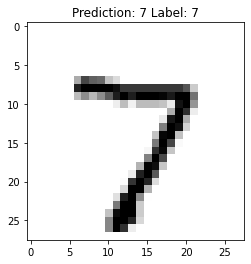

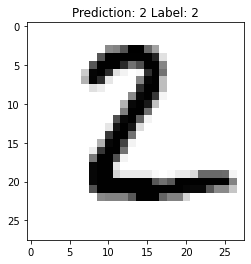

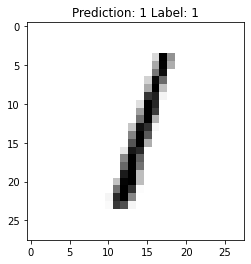

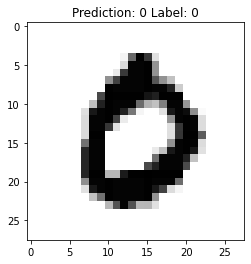

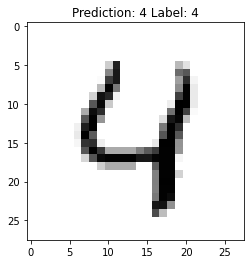

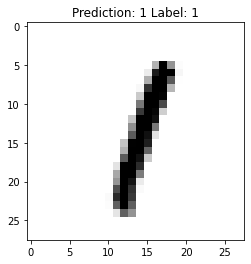

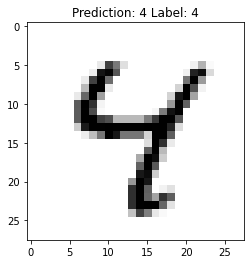

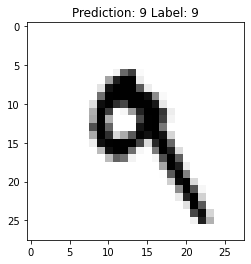

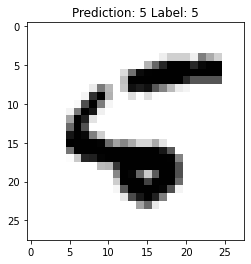

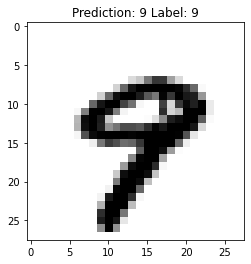

In [17]:
# let us check correctly predicted images

for x in range(10):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    #if (predicted_cat != label):
    if (predicted_cat == label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()


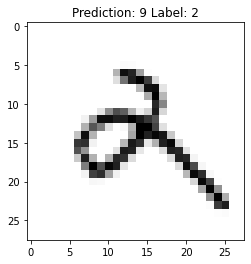

In [18]:
# let us see incorrectly predicted images. where range(200) is set for to search within first 200 samples.
for x in range(200):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
    #if (predicted_cat == label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()
